In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
data_validation = pd.read_csv('validation.csv')

In [ ]:
Clicks2= []
Spend2 =[] 
CTR2 =[] 
CPM2 =[] 
eCPC2 =[]

max=0
best_range=''
Range =[]
impressions = []

for i in range(1,150,5):
    for j in range(300, 151,-10):
        print('lower bound is ',i)
        print('upper bound is ',j)
        
        count =0 #count number of impressions 
        budget = 6250000 
        clicks=0
        for x, y in data_validation.iterrows():
            #Set random price from i(lower bound) and j(upper bound)
            bid_price = np.random.randint(i,j)
            payprice=y['payprice'] 
            if (bid_price>= payprice):
                budget= budget-payprice
                if (budget>=0):
                    count+=1 
                    if (y['click']==1):
                        clicks +=1
                else:
                    item= '['+str(i)+','+str(j)+']'
                    Range.append(item)
                    impressions.append(count)
                    budget= budget+payprice
                    if max<count:
                        max = count
                        best_range = item 
                    break
        CtR = clicks/count
        Spent = 6250000 - budget
        cPM = 1000*Spent/count
        if (clicks >0):
            ecPC = Spent/clicks
        else:
            ecPC =0

        
        Clicks2.append(clicks)
        Spend2.append(Spent)
        CTR2.append(CtR)
        eCPC2.append(ecPC)
        CPM2.append(cPM)          
          
          

In [ ]:
Random_bid_range=pd.DataFrame(Range, columns=['Bid Range'])
Random_bid_range['Number of Impressions']=impressions
Random_bid_range['Number of Clicks']=Clicks2
Random_bid_range['Spent Amount']=Spend2
Random_bid_range['CTR']=CTR2
Random_bid_range['CPC']=eCPC2
Random_bid_range['CPM']=CPM2

In [ ]:
print (Random_bid_range['Number of Clicks'].max())
print (Random_bid_range['Number of Impressions'].max())

In [ ]:
#Range of bids that recorded more than 1300000 impressions 
High_Imps=Random_bid_range.loc[Random_bid_range['Number of Impressions']>=130000]
High_Imps

In [11]:
High_Imps['lower bound']= [1,6,11,16,21,26,31]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


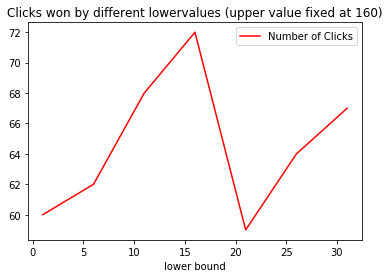

In [13]:
High_Imps.plot(kind='line',x='lower bound',y='Number of Clicks',color='red')
plt.title('Clicks won by different lowervalues (upper value fixed at 160)')
plt.savefig('maximum_impression_counts.png')
plt.show()